<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Packt/blob/main/StableDiffusionChapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install diffusers

In [9]:
!pip install accelerate

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

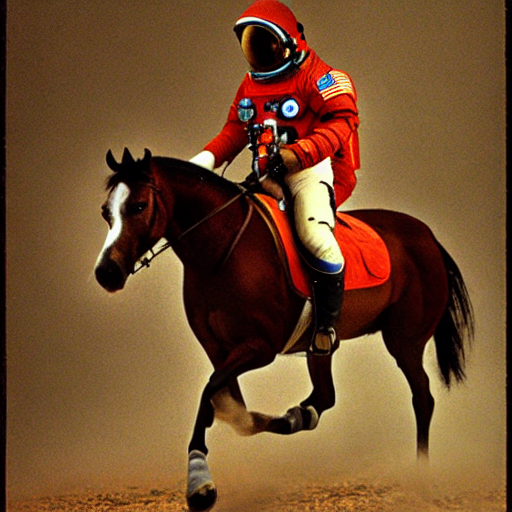

In [10]:
import torch
from diffusers import StableDiffusionPipeline

text2img_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
).to("cuda:0")

# generate an image
prompt = "high resolution, a photograph of an astronaut riding a horse"
image = text2img_pipe(
    prompt = prompt
    , generator = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

In [11]:
!pip install accelerate
text2img_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.bfloat16       # <- load float16 version weight
).to("cuda:0")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

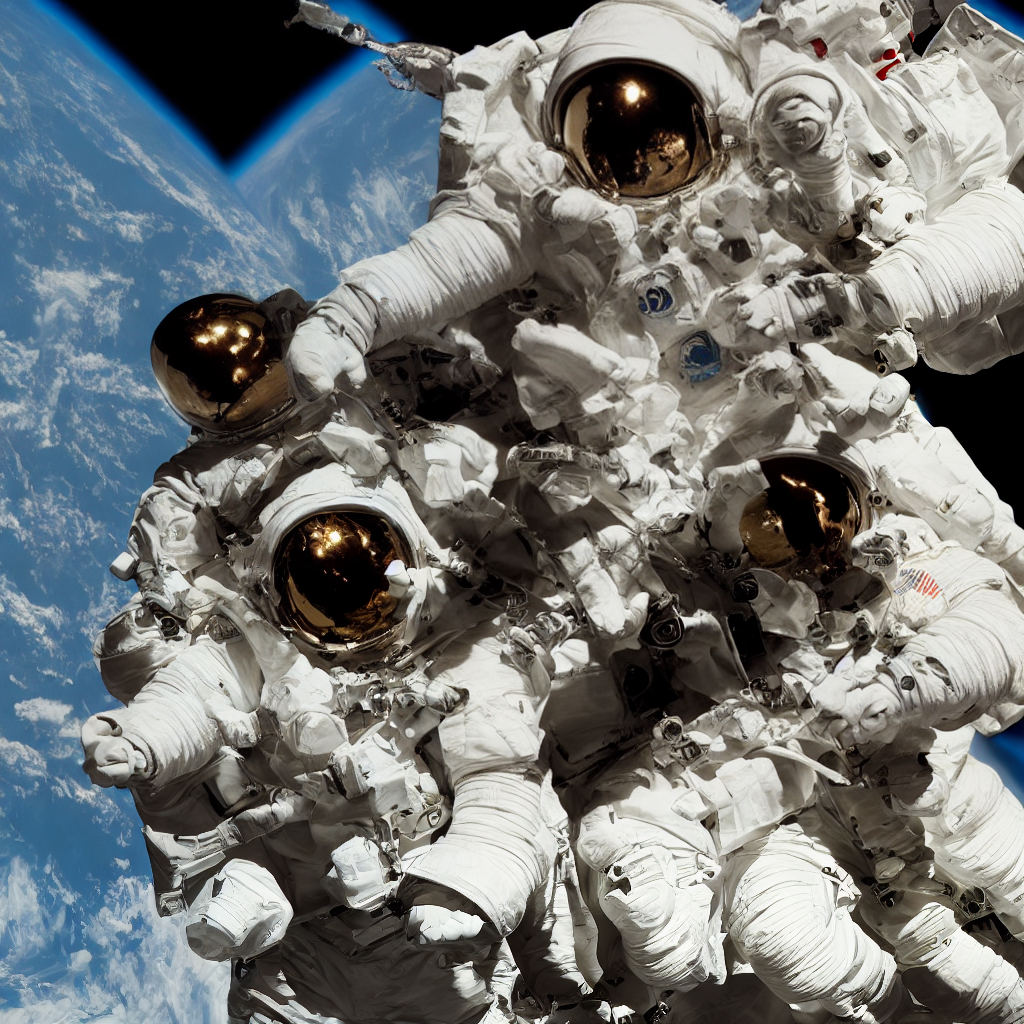

In [12]:
text2img_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.float16       # <- load float16 version weight
).to("cuda:0")

text2img_pipe.enable_vae_tiling()       # < Enable VAE Tiling
prompt = "high resolution, a photograph of an astronaut riding a horse"
image = text2img_pipe(
    prompt = prompt
    , generator = torch.Generator("cuda:0").manual_seed(1)
    , width = 1024
    , height= 1024
).images[0]
image

In [13]:
!pip install xformers

In [14]:
import xformers

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

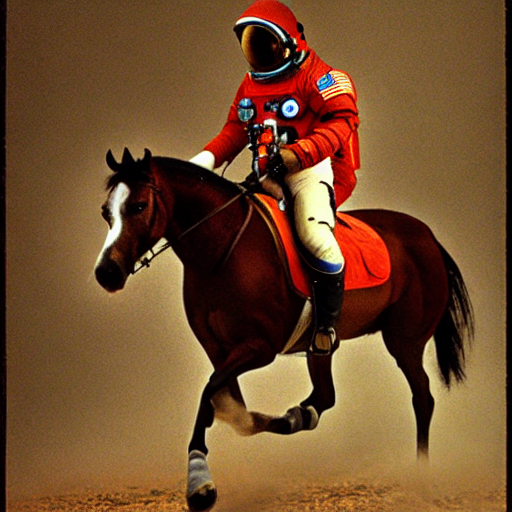

In [15]:
import torch
from diffusers import StableDiffusionPipeline

text2img_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.float16       # <- load float16 version weight
).to("cuda:0")

text2img_pipe.enable_xformers_memory_efficient_attention()  # < Enable xformers
prompt = "high resolution, a photograph of an astronaut riding a horse"
image = text2img_pipe(
    prompt = prompt
    , generator = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

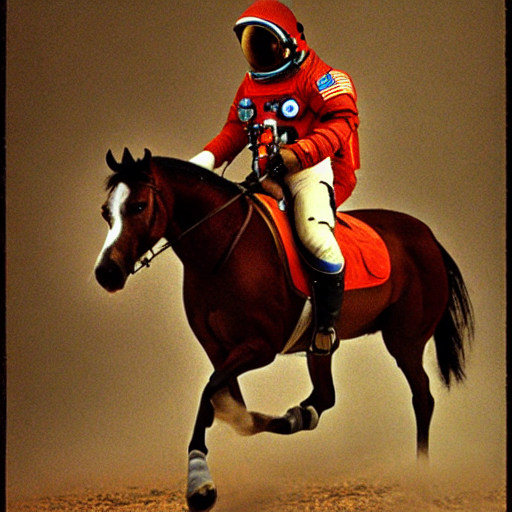

In [16]:
import torch
from diffusers import StableDiffusionPipeline

text2img_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.float16
).to("cuda:0")

# generate an image
text2img_pipe.enable_sequential_cpu_offload() # <- Enable sequential CPU offload
prompt = "high resolution, a photograph of an astronaut riding a horse"
image = text2img_pipe(
    prompt = prompt
    , generator = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

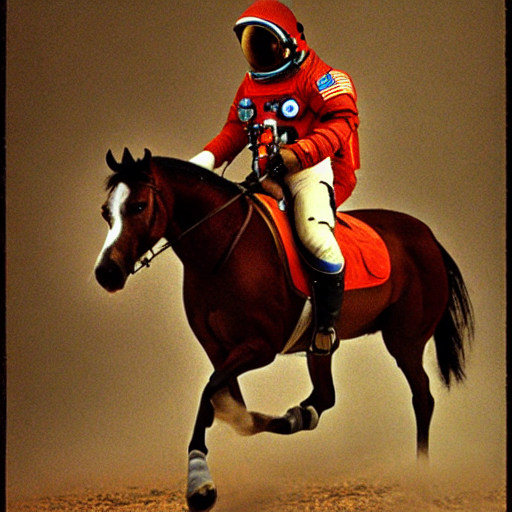

In [17]:
import torch
from diffusers import StableDiffusionPipeline

text2img_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.float16
)                                           # .to("cuda") is removed here

# generate an image
text2img_pipe.enable_model_cpu_offload()    # <- enable model offload
prompt = "high resolution, a photograph of an astronaut riding a horse"
image = text2img_pipe(
    prompt = prompt
    , generator = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image

In [18]:
!pip install tomesd

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

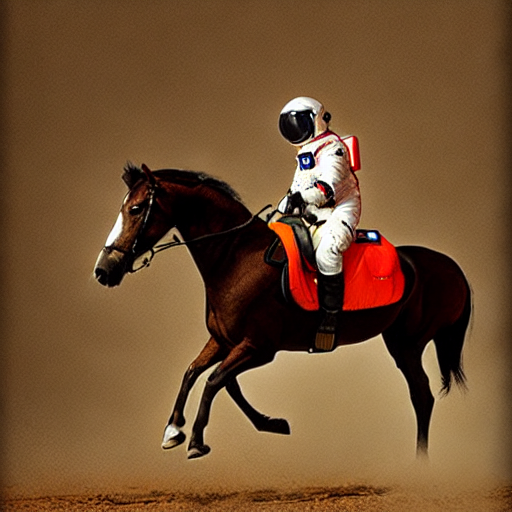

In [19]:
import torch
from diffusers import StableDiffusionPipeline
import tomesd

text2img_pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.float16
).to("cuda:0")

tomesd.apply_patch(text2img_pipe, ratio=0.5)
# generate an image
prompt = "high resolution, a photograph of an astronaut riding a horse"
image = text2img_pipe(
    prompt = prompt
    , generator = torch.Generator("cuda:0").manual_seed(1)
).images[0]
image